# **FORECASTING ANALYSIS DENGAN SVR & RNN**
---
Disclaimer: colab ini ditujukan secara khusus untuk mahasiswa PMA (A), tidak diizinkan untuk membagikan colab ini tanpa izin asdos :P

Terus ini kalau mau belajar lagi bisa di:<br>
https://belajar-sac.notion.site/Forecasting-Analysis-9320871a62f3452d9c8354bb20ac65d9?pvs=4

https://lunar-primula-dd6.notion.site/PMA-Bu-Wiwik-bf9a0be8bfeb4beeb30df39a449240b1?pvs=4

---


# **Materi 1: Pengenalan Konsep SVM & SVR**

---
## **Mengenal SVM**
SVM (Support Vector Machine) itu sendiri salah satu algoritma ML yang termasuk dalam kategori supervise learning dan bisa digunakan untuk menangani tugas  klasifikasi, regresi, dan deteksi outlier.

Terdapat dua tipe SVM: Linear & Non Linear <br>
**Linear SVM** cocok untuk data yang dapat dipisahkan dengan garis lurus, sedangkan **Non-Linear SVM** menggunakan kernel untuk menangani data yang tidak dapat dipisahkan secara linear dengan transformasi ke ruang dimensi yang lebih tinggi.

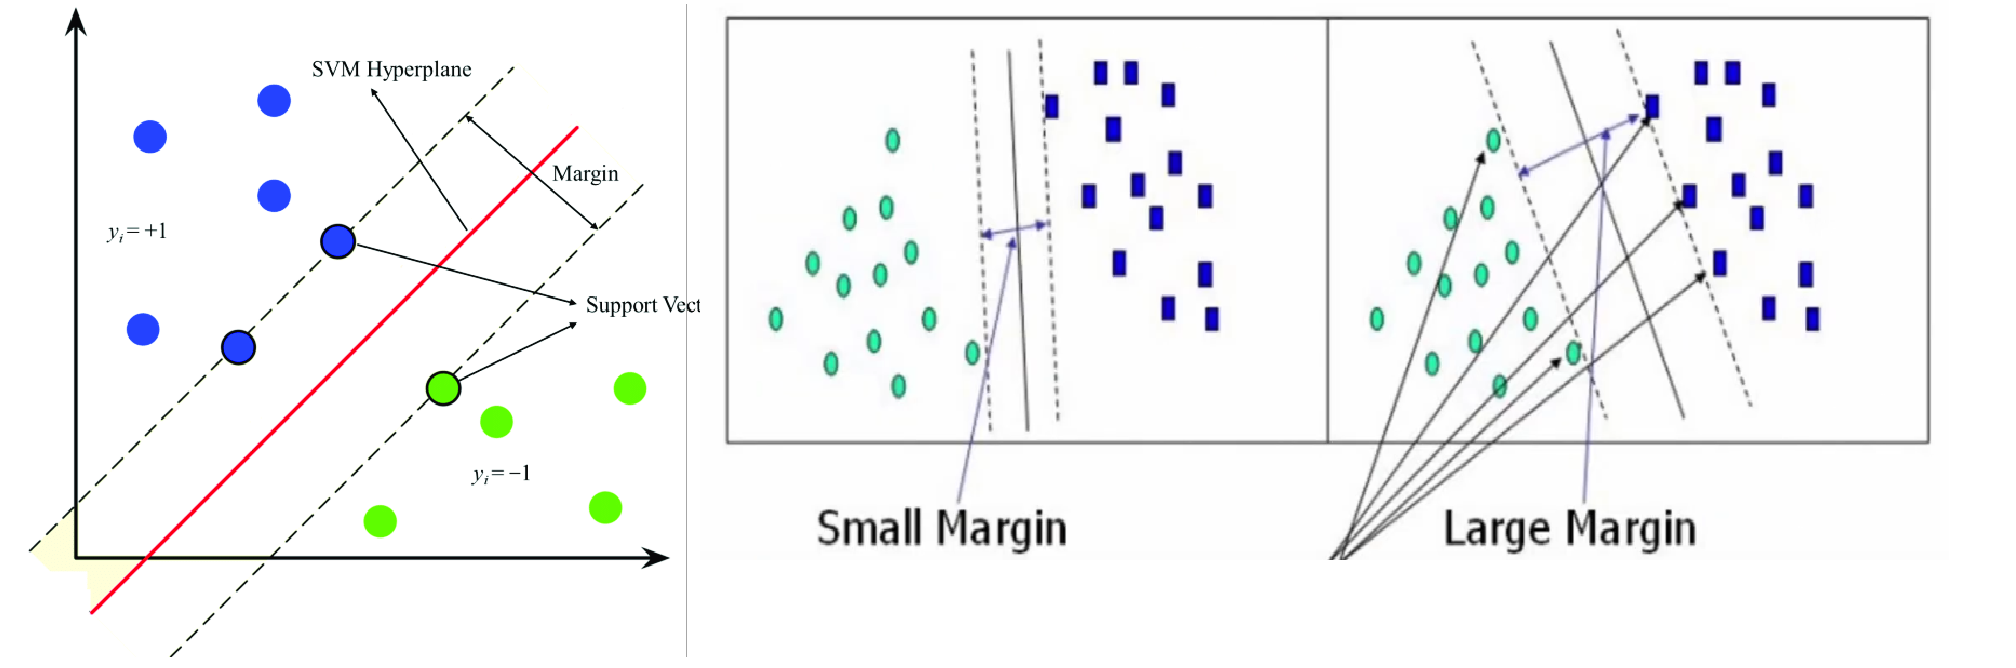

# Istilah dalam SVM
*  **Hyperplane:** garis pemisah antar data dalam ruang fitur, penggunaannya akan menyesuaikan tugas yang dikerjakan
*   **Margin:** jarak antara hyperplane dengan titik titik data terdekat dari kedua kelas
*  **Support Vector**: jarak antara hyperplane dengan titik titik data terdekat dari kedua kelas
*  **Boundary line:** dua garis yang ditarik di sekitar hyperplane pada jarak tertentu (epsilon).
* **kernel:** kumpulan fungsi matematika untuk menemukan hyperplane di ruang dimensi yang lebih tinggi. Jenis kernel yang biasa digunakan dalam SVR adalah kernel linear, sigmoid, kernel polinomial, kernel Gaussian Radial Basis Function (RBF), dll.  
*  **Epsilon:** parameter yang menentukan batas kesalahan atau toleransi kesalahan yang diizinkan
*  **Parameter C:** parameter SVM yang berfungsi dalam mengontrol trade off antara margin dan error klasifikasi (ξ) atau nilai kesalahan pada klasifikasi. Nilai C yang lebih besar menyebabkan model cenderung memprioritaskan penyesuaian yang lebih ketat terhadap data pelatihan dengan mengurangi margin hyperplane, yang dapat menghasilkan kinerja yang baik pada data pelatihan tetapi mungkin mempengaruhi kemampuan model untuk menggeneralisasi pola pada data uji.  Pemilihan nilai C yang optimal bergantung pada sifat dan ukuran dataset


# SVM untuk Tugas Klasifikasi

Dalam SVM, setiap item data direpresentasikan sebagai titik dalam ruang n dimensi, di mana n adalah jumlah fitur dalam dataset. Koordinat setiap titik data sesuai dengan nilai dari setiap fitur. Tujuan utama SVM dalam model klasifikasi adalah menemukan hyperplane yang efektif memisahkan kedua kelas dengan baik dalam ruang fitur.

SVM mencari hyperplane yang optimal dengan cara mencoba memaksimalkan margin, yaitu jarak yang terbesar antara titik-titik data dari kedua kelas yang terdekat dengan hyperplane. Margin ini memberikan penguatan karena memastikan bahwa hyperplane yang dipilih bisa memisahkan kedua kelas dengan sejauh mungkin, sehingga meningkatkan kemampuan SVM untuk mengklasifikasikan data uji dengan akurasi yang baik.
<br>

**Sederhananya,** SVM dalam model klasifikasi berfungsi untuk memisahkan data ke dalam kategori yang berbeda dengan menemukan hyperplane yang memaksimalkan margin antar kelas sehingga dapat mengklasifikasikan data uji dengan akurasi yang baik

<br>

## SVM untuk Tugas Regresi (SVR)
SVR atau Support Vector Regression adalah variasi dari SVM yang khusus menangani tugas regresi (emmodelkan hubungan antara variabel independen dan variabel dependen dengan tipe datanya itu numerik kontinu). Jadi nanti tujuan utamanya SVR adalah membuat dan menemukan hyperplane optimal yang dapat mendekati titik-titik data yang akan diprediksi

**Model SVR yang baik punya karakteristik berikut:** <br> <br>
Model SVR yang baik mampu mengapit atau mendekati sebagian besar titik data pelatihan dengan akurat.
Model SVR yang baik mampu memprediksi data uji dengan tingkat akurasi yang tinggi.
Parameter seperti C dan jenis kernel harus dioptimalkan dengan baik untuk meningkatkan performa model SVR.

## Praktikum SVR
**Alur Tahapan Pengembangan Model ML/DL**
<img src="https://belajar-sac.notion.site/image/https%3A%2F%2Fprod-files-secure.s3.us-west-2.amazonaws.com%2F9b27ad10-da39-4c02-a2f8-fd1d41b38a2a%2Fce481590-c212-4280-b4a8-0f5b91b459c8%2FGroup_10(1).jpg?table=block&id=bcae2a78-6d90-4979-bec4-aa73fe0dd918&spaceId=9b27ad10-da39-4c02-a2f8-fd1d41b38a2a&width=2000&userId=&cache=v2">

## Persiapan Data
Pada tahap ini, dataset yang digunakan dikumpulkan dan dipersiapkan sebelum nantinya dilakukan proses analisis dan pemodelan. Proses ini melibatkan dua tahap utama, yaitu data prepocessing dan data postprocessing.
<br>
Pada **data prepocessing**, dataset yang sudah dikumpulkan akan diubah, dibersihkan, dan dipersiapkan terlebih dahulu sebelum dianalisis lebih lanjut.
<br>
Pada **data postprepocessing**, dataset akan melalui langkah-langkah interpretasi hasil dan visualisasi data untuk meningkatkan pemahaman terhadap data, serta dapat melibatkan optimasi model guna meningkatkan kinerja analisis atau pemodelan nantinya.

### langkah 1 : Import & Load Library

In [3]:
# Import Library
import pandas as pd  # Pandas digunakan untuk manipulasi dan analisis data.
import numpy as np   # NumPy menyediakan dukungan untuk array dan operasi matematika.
import sklearn.metrics as sm  # Modul metrics dari scikit-learn digunakan untuk mengukur kinerja model.
import matplotlib.pyplot as plt  # Matplotlib digunakan untuk membuat visualisasi data, seperti grafik.
from sklearn.svm import SVR  # SVR (Support Vector Regression) dari scikit-learn digunakan sebagai model regresi.
from sklearn.utils import shuffle  # Fungsi shuffle digunakan untuk mengacak dataset.
from sklearn.metrics import mean_squared_error, mean_absolute_error  # Metrik evaluasi regresi seperti MSE dan MAE.
from sklearn.preprocessing import StandardScaler  # StandardScaler digunakan untuk penskalaan fitur.
from sklearn.model_selection import train_test_split  # train_test_split digunakan untuk membagi dataset menjadi data pelatihan dan pengujian.
from sklearn.preprocessing import MinMaxScaler  # MinMaxScaler digunakan untuk penskalaan fitur, namun dengan rentang nilai antara 0 dan 1.
from sklearn.model_selection import GridSearchCV

### Langkah 2 : Import & Load dataset
<br>
Hasil yang didapat:
<br>
Dapat diketahui bahwa dataset Bali 2015 - 2022.csv.csv memiliki X rows dengan 2 variabel yaitu Y dan Z
<br>
<br>
jadi dataset nantinya memiliki 2 kolom dan datetime sebagai index
<br>
url dataset: https://raw.githubusercontent.com/portodit/EASPMA/main/Bali%202015%20-%202022.csv

In [2]:
data_svr = pd.read_csv('Dataset\\Bali 2020 - 2022.csv')
data_svr

,datetime,total_visitor,total_accomodation
0,1/1/2014,279257,16495
1,2/1/2014,275795,17221
2,3/1/2014,276573,17330
3,4/1/2014,280096,17737
4,5/1/2014,286033,18836
...,...,...,...
103,8/1/2022,276659,55932
104,9/1/2022,291162,56233
105,10/1/2022,305244,56611
106,11/1/2022,287398,56946


### Langkah 3 : Mempertahankan sejumlah sampel tertentu dari dataset
Catatan:<br>
**Jumlah sampel yang memadai** memastikan representasi data yang cukup baik, memungkinkan model untuk memahami pola yang sebenarnya. Hal ini membantu menghindari masalah overfitting atau underfitting, yang dapat timbul akibat jumlah sampel yang kurang atau terlalu banyak. Selain itu, efisiensi komputasional juga ditingkatkan dengan mempertahankan jumlah sampel yang sesuai, mengoptimalkan waktu dan sumber daya yang dibutuhkan selama proses pelatihan model.

In [8]:
nums_samples_to_keep = 108
data_svr = data_svr[:nums_samples_to_keep]

### Langkah 4: Konversi kolom 'datetime' menjadi tipe data waktu

Langkah ini bertujuan untuk memastikan bahwa kolom yang berisi informasi tanggal ('datetime') diubah menjadi tipe data waktu untuk memungkinkan manipulasi waktu yang lebih mudah. Selanjutnya, pembuatan kolom 'Year' dan 'Month' bertujuan untuk mengekstrak informasi tahun dan bulan dari kolom waktu, memfasilitasi analisis berbasis waktu.

In [5]:
data_svr['datetime'] = pd.to_datetime(data_svr['datetime'])
data_svr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   datetime            108 non-null    datetime64[ns]
 1   total_visitor       108 non-null    int64         
 2   total_accomodation  108 non-null    int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 2.7 KB


### Langkah 5: Normalisasi data

Normalisasi dilakukan berdasarkan hasil dari deskripsi statitik dataframe yang diperoleh yaitu adanya perbedaan rentang nilai yang begitu besar dan perlu dilakukan normalisasi untuk menyerdehanakan perbedaan rentang nilai yang besar

In [6]:
# Inisialisasi MinMaxScaler
scaler = MinMaxScaler()

# Pilih kolom yang perlu dinormalisasi (misalnya, 'total_visitor' dan 'total_accomodation')
columns_to_normalize = ['total_visitor', 'total_accomodation']

# Salin data_svr ke svr_norm
svr_norm = data_svr.copy()

# Melakukan normalisasi pada kolom yang dipilih dan menyimpan hasilnya pada svr_norm
svr_norm[columns_to_normalize] = scaler.fit_transform(data_svr[columns_to_normalize])
svr_norm

,datetime,total_visitor,total_accomodation
0,2014-01-01,0.447265,0.000000
1,2014-02-01,0.441720,0.017366
2,2014-03-01,0.442966,0.019973
3,2014-04-01,0.448609,0.029708
4,2014-05-01,0.458118,0.055995
...,...,...,...
103,2022-08-01,0.443104,0.943311
104,2022-09-01,0.466332,0.950511
105,2022-10-01,0.488886,0.959552
106,2022-11-01,0.460304,0.967565


### Langkah 6 : Persiapan data untuk model

Pada langkah ini dilakukan pemisahan fungsi fitur/variabel sebagai prediktor dan target, serta mengecek nama variabel

In [13]:
svr_data = svr_norm[['datetime', 'total_accomodation']][:nums_samples_to_keep]
svr_target = svr_norm['total_visitor'][:nums_samples_to_keep]
predictor = ['datetime', 'total_accomodation']
x = svr_norm.iloc[:, [1]].values
y = svr_norm.iloc[:, 1].values
svr_data

,datetime,total_accomodation
0,2014-01-01,0.000000
1,2014-02-01,0.017366
2,2014-03-01,0.019973
3,2014-04-01,0.029708
4,2014-05-01,0.055995
...,...,...
103,2022-08-01,0.943311
104,2022-09-01,0.950511
105,2022-10-01,0.959552
106,2022-11-01,0.967565


## **Pengembangan Model**
Tahapan ini dimulai dengan memilih metode yang sesuai dengan tujuan analisis yang diinginkan dalam pengembangan model. Setelah pemilihan model, data yang diperlukan dikumpulkan dan disiapkan melalui langkah pengumpulan dan persiapan data. Selanjutnya, data dibagi menjadi set latih dan set uji untuk melatih dan menguji kinerja model. Proses pelatihan model dilakukan dengan menyesuaikan parameter agar model dapat memahami pola yang ada dalam data.


### **Skenario 1: 80% data train & 20% data set**
Pada skenario ini, model forecasting diberi nama **best_regressor_s1**

### Langkah 1: Pembagian data menjadi data train dan data test

Tujuan utamanya adalah untuk mempersiapkan dataset yang dapat digunakan dalam pelatihan dan evaluasi model machine learning atau statistik, di sini menggunakan Support Vector Regression (SVR) dengan variabel 'total_accomodation' sebagai fitur dan 'total_visitor' sebagai target.

In [14]:
X_train_s1, X_test_s1, y_train_s1, y_test_s1 = train_test_split(svr_norm[['total_accomodation']], svr_norm['total_visitor'], test_size=0.2, random_state=1337)

In [15]:
# Menampilkan ukuran dari train set dan test set
lengths = {
    'X_train_s1': len(X_train_s1),
    'y_train_s1': len(y_train_s1),
    'X_test_s1': len(X_test_s1),
    'y_test_s1': len(y_test_s1)
}

lengths_df = pd.DataFrame.from_dict(lengths, orient='index', columns=['Length'])
print(lengths_df)

            Length
X_train_s1      86
y_train_s1      86
X_test_s1       22
y_test_s1       22


### Langkah 2: Proses tuning hyperparameter menggunakan Grid Search Cross-Validation pada SVR Model

Tujuan utama dari serangkaian perintah ini adalah untuk menemukan parameter terbaik untuk model SVR dalam konteks skenario atau eksperimen tertentu (disebut sebagai Skenario 2). Parameter terbaik ini kemudian dapat digunakan untuk melatih model SVR yang lebih optimal.

In [18]:
param_grid_s1 = {
    'C': [0.01, 0.1, 1],
    'epsilon': [0.01, 0.1, 1],
    'kernel': ['linear', 'rbf']
}
grid_search_s1 = GridSearchCV(estimator=SVR(), param_grid=param_grid_s1, refit=True, verbose=3)
grid_search_s1.fit(X_train_s1, y_train_s1)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV 1/5] END C=0.01, epsilon=0.01, kernel=linear;, score=-0.314 total time=   0.0s
[CV 2/5] END C=0.01, epsilon=0.01, kernel=linear;, score=-0.228 total time=   0.0s
[CV 3/5] END C=0.01, epsilon=0.01, kernel=linear;, score=0.007 total time=   0.0s
[CV 4/5] END C=0.01, epsilon=0.01, kernel=linear;, score=0.002 total time=   0.0s
[CV 5/5] END C=0.01, epsilon=0.01, kernel=linear;, score=-0.188 total time=   0.0s
[CV 1/5] END ..C=0.01, epsilon=0.01, kernel=rbf;, score=0.176 total time=   0.0s
[CV 2/5] END .C=0.01, epsilon=0.01, kernel=rbf;, score=-0.022 total time=   0.0s
[CV 3/5] END ..C=0.01, epsilon=0.01, kernel=rbf;, score=0.193 total time=   0.0s
[CV 4/5] END ..C=0.01, epsilon=0.01, kernel=rbf;, score=0.257 total time=   0.0s
[CV 5/5] END ..C=0.01, epsilon=0.01, kernel=rbf;, score=0.167 total time=   0.0s
[CV 1/5] END C=0.01, epsilon=0.1, kernel=linear;, score=-0.374 total time=   0.0s
[CV 2/5] END C=0.01, epsilon=0.1, kerne

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.01, 0.1, 1], 'epsilon': [0.01, 0.1, 1],
                         'kernel': ['linear', 'rbf']},
             verbose=3)

In [19]:
print(f'Best Parameters Skenario 1: {grid_search_s1.best_params_}')

Best Parameters Skenario 1: {'C': 1, 'epsilon': 0.01, 'kernel': 'rbf'}


### Langkah 3: Optimasi hyperparameter dan pelatihan model SVR menggunakan Grid Search Cross-Validation (Grid_search).

tujuan utama dari langkah ini adalah untuk memilih model SVR terbaik melalui Grid Search dan menggunakan model tersebut untuk melakukan prediksi terhadap data uji.

In [20]:
best_regressor_s1 = grid_search_s1.best_estimator_
y_pred_s1 = best_regressor_s1.predict(X_test_s1)
best_regressor_s1.fit(X_train_s1, y_train_s1)

SVR(C=1, epsilon=0.01)

## **Evaluasi Model**
Evaluasi model merupakan langkah kritis yang menggunakan set uji untuk mengukur performa, dengan berbagai metrik seperti akurasi atau presisi. Hasil evaluasi dapat memicu langkah fine-tuning dan optimasi model guna meningkatkan performa. Setelah model telah dikembangkan dan dioptimalkan, langkah implementasi mengizinkan model untuk digunakan dalam membuat prediksi atau pengambilan keputusan. Monitoring dan pemeliharaan terus-menerus dilakukan untuk memastikan performa model tetap optimal seiring waktu.


### Langkah 1: Evaluasi Kinerja Model dengna menghitung nilai  MAE, MAPE RMSE,  & MSE

Langkah ini ditunjukkan untuk Menghitung dan menampilkan metrik performa evaluasi kinerja model SVR, seperti MAE, RMSE, MSE, dan MAPE dalam persentase, untuk mengevaluasi seberapa baik model SVR telah bekerja pada data uji dalam Skenario 1.

In [22]:
rmse_s1 = np.sqrt(mean_squared_error(y_test_s1, y_pred_s1))
mse_s1 = mean_squared_error(y_test_s1, y_pred_s1)
mape_s1 = sm.mean_absolute_percentage_error(y_test_s1, y_pred_s1)
print(f'Skenario 1 - MAE: {sm.mean_absolute_error(y_test_s1, y_pred_s1):.2f}')
print(f'Skenario 1 - RMSE: {rmse_s1:.2f}')
print(f'Skenario 1 - MSE: {mse_s1:.2f}')
print(f'Skenario 1 - MAPE: {mape_s1:.2f}%')

Skenario 1 - MAE: 0.07
Skenario 1 - RMSE: 0.09
Skenario 1 - MSE: 0.01
Skenario 1 - MAPE: 1298.01%


In [23]:
scaler.inverse_transform(y_pred_s1.reshape(-1, 2))

array([[283320.41613132,  44383.73932354],
       [ 14159.66738182,  37214.91188653],
       [ 86247.15508739,  46033.00781236],
       [262576.56505994,  27765.20524662],
       [531711.48716335,  17100.75698934],
       [332304.80285074,  51761.8451516 ],
       [322733.58153549,  51783.30285134],
       [450262.29925171,  49991.5013405 ],
       [410813.15253345,  24401.63466276],
       [536248.04394486,  15862.812238  ],
       [407086.62154089,  21400.81818077]])

### Langkah 2: Visualisasi Hasil Prediksi Model SVR Skenario 1


Membuat scatter plot yang membandingkan nilai aktual dengan nilai prediksi yang dihasilkan oleh model SVR dalam Skenario 1. Garis merah putus-putus (Perfect Prediction) ditambahkan sebagai referensi untuk menunjukkan sejauh mana prediksi mendekati nilai aktual. Visualisasi ini membantu memahami seberapa baik model mampu memprediksi nilai dengan membandingkannya dengan nilai aktual.

<br>
<br>
Setelah mengetahui evaluasi model SVR, maka selanjutnya melakukan visualisasi hasil prediksi model SVR dalam scatter plot. Visualisasi ini membantu memahami seberapa baik model mampu memprediksi dengan membandingkannya dengan nilai aktual.  Setiap titik pada scatterplot mewakili satu observasi pada data pengujian, yang mana:
Titik Biru, mewakili hasil prediksi model SVR.
Garis Merah dengan pola putus-putus, mewakili garis diagonal yang merupakan garis "Perfect Prediction". Jika semua prediksi sempurna, semua titik akan berada pada garis ini.


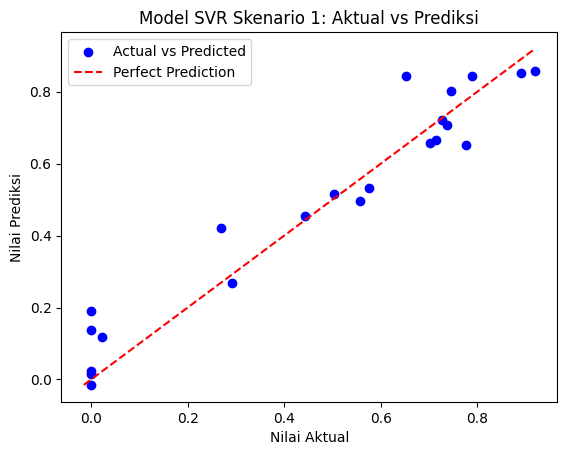

In [24]:
plt.scatter(y_test_s1, y_pred_s1, color='blue', label='Actual vs Predicted')

max_value_s1 = max(max(y_test_s1), max(y_pred_s1))
min_value_s1 = min(min(y_test_s1), min(y_pred_s1))
plt.plot([min_value_s1, max_value_s1], [min_value_s1, max_value_s1], color='red', linestyle='--', label='Perfect Prediction')

plt.title('Model SVR Skenario 1: Aktual vs Prediksi')
plt.xlabel('Nilai Aktual')
plt.ylabel('Nilai Prediksi')
plt.legend()
plt.show()

### Langkah 3: membuat prediksi untuk 12 periode kedepan

In [25]:
# Extend predictions to the future
future_timeframe = 12  # Berdasarkan bulan-bulan ke depan

# Menggunakan model terbaik untuk memprediksi nilai di masa depan
future_index_s1 = np.arange(len(X_train_s1) + len(X_test_s1), len(X_train_s1) + len(X_test_s1) + future_timeframe).reshape(-1, 1)
future_predictions_s1 = best_regressor_s1.predict(future_index_s1)

c:\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(


### Langkah 4: Hasil Visualisasi Forecast pengunjung untuk 12 Bulan Kedepan untuk scenario 1

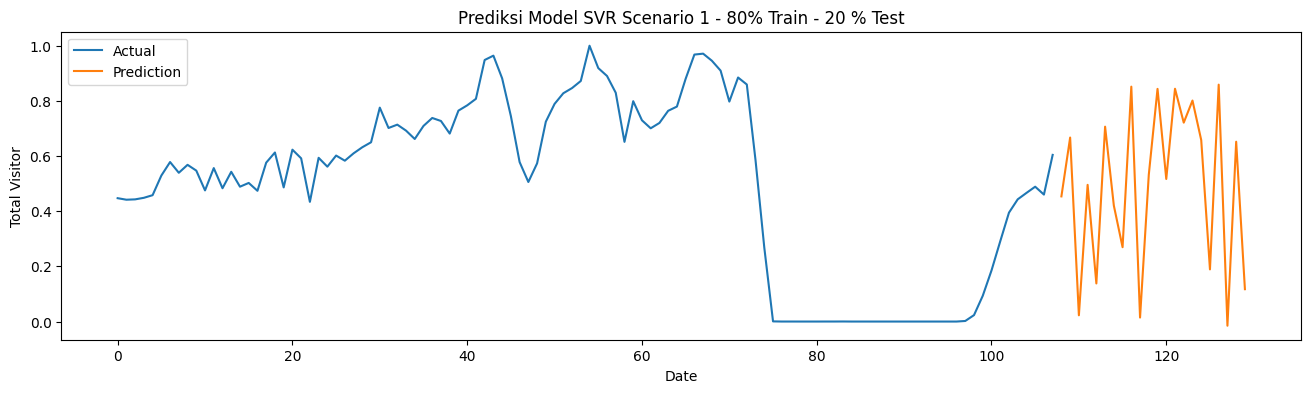

╒═════════════════════╤══════════════╕
│ Date                │   Prediction │
╞═════════════════════╪══════════════╡
│ 2023-01-01 00:00:00 │    0.453773  │
├─────────────────────┼──────────────┤
│ 2023-02-01 00:00:00 │    0.667083  │
├─────────────────────┼──────────────┤
│ 2023-03-01 00:00:00 │    0.0226785 │
├─────────────────────┼──────────────┤
│ 2023-04-01 00:00:00 │    0.495609  │
├─────────────────────┼──────────────┤
│ 2023-05-01 00:00:00 │    0.138136  │
├─────────────────────┼──────────────┤
│ 2023-06-01 00:00:00 │    0.706533  │
├─────────────────────┼──────────────┤
│ 2023-07-01 00:00:00 │    0.420549  │
├─────────────────────┼──────────────┤
│ 2023-08-01 00:00:00 │    0.269577  │
├─────────────────────┼──────────────┤
│ 2023-09-01 00:00:00 │    0.851602  │
├─────────────────────┼──────────────┤
│ 2023-10-01 00:00:00 │    0.0144894 │
├─────────────────────┼──────────────┤
│ 2023-11-01 00:00:00 │    0.532228  │
├─────────────────────┼──────────────┤
│ 2023-12-01 00:00:00 │  

In [26]:
from tabulate import tabulate
# Plotting
plt.figure(figsize=(16, 4))

# Plotting the actual values
plt.plot(y, label='Actual')

# Plotting the extended predictions
plt.plot(np.arange(len(y), len(y) + len(y_test_s1)), y_pred_s1, label='Prediction')

plt.title('Prediksi Model SVR Scenario 1 - 80% Train - 20 % Test')
plt.xlabel('Date')
plt.ylabel('Total Visitor')
plt.legend()
plt.show()

# Generate the forecast dates from January 2023 to December 2023
forecast_dates = pd.date_range(start='2023-01-01', end='2023-12-01', freq='MS')

# Create a list of forecast dates and prediction values
data = list(zip(forecast_dates, y_pred_s1))

# Create a list of headers for the table
headers = ['Date', 'Prediction']
table = tabulate(data, headers=headers, tablefmt='fancy_grid')
# Print the table
print(table)

In [ ]:
plt.figure(figsize=(15, 5))

# Scenario 1
plt.subplot(1, 3, 1)
plt.plot(y, label='Actual')
plt.plot(np.arange(len(y), len(y) + len(y_test_s1)), y_pred_s1, label='Prediction')
plt.xlabel('Date')
plt.ylabel('Total Visitor')
plt.title('SVR Scenario 1 80% Train 20% Test')
plt.legend()

# **Materi 2: Pengenalan Konsep RNN**

## Mengenal Deep Learning
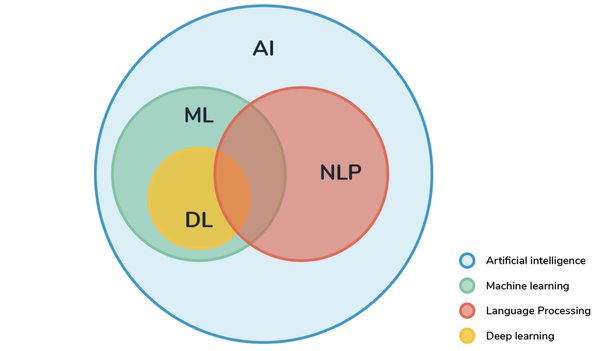

Deep learning adalah cabang dari pembelajaran mesin yang menggunakan jaringan saraf tiruan (Artifial Neural Network) dengan banyak lapisan, meniru struktur hierarkis jaringan saraf manusia. Dalam deep learning, jaringan ini memproses informasi melalui serangkaian lapisan untuk mengekstraksi fitur secara bertingkat dari data masukan. Dengan perbaruan bobotnya selama proses belajar, jaringan ini bisa mempelajari representasi yang mendalam dari data, menjadi sangat berguna dalam bidang seperti pengenalan gambar, bahasa, dan lainnya.
<br>
RNN (Recurrent Neural Network), LSTM (Long Short-Term Memory), dan GRU (Gated Recurrent Unit) adalah tiga jenis arsitektur jaringan saraf tiruan yang umum digunakan dalam pemodelan urutan data seperti teks, waktu, atau urutan lainnya. Mereka mempertahankan memori atau informasi kontekstual dari urutan masukan sebelumnya saat memproses urutan data.


1.   RNN adalah arsitektur dasar yang terdiri dari neuron yang terhubung secara berulang, memungkinkan informasi untuk diungkapkan dan diproses dari urutan masukan sebelumnya ke yang berikutnya. Namun, RNN memiliki kendala dalam menangani masalah memori panjang karena kesulitan dalam mengingat informasi dari urutan masukan yang lebih lama.
2.   LSTM (Long Short-Term Memory) adalah modifikasi dari RNN yang didesain untuk mengatasi masalah hilangnya informasi jangka panjang. LSTM menggunakan struktur sel memori yang terdiri dari tiga gerbang (input, forget, dan output gate) serta sel memori sendiri, yang memungkinkannya untuk mengontrol aliran informasi dalam jaringan. Dengan gerbang ini, LSTM dapat mengingat informasi jangka panjang dan memutuskan kapan untuk melupakan atau menggunakan informasi tertentu.
1.   GRU (Gated Recurrent Unit) juga merupakan modifikasi dari RNN yang memiliki struktur yang lebih sederhana daripada LSTM. GRU menggabungkan unit yang bertanggung jawab atas kontrol memori dan unit yang mengatur aliran informasi dalam satu struktur, yaitu gerbang reset (reset gate) dan gerbang pembaruan (update gate). GRU menunjukkan kinerja yang baik dalam banyak tugas pemodelan urutan dengan kompleksitas yang lebih rendah daripada LSTM.

Perbedaannya terletak pada struktur dan kompleksitasnya: LSTM memiliki struktur yang lebih kompleks dengan tiga gerbang, sedangkan GRU memiliki struktur yang lebih sederhana dengan hanya dua gerbang. LSTM kadang-kadang cenderung memiliki kinerja yang lebih baik dalam menangani masalah memori jangka panjang, tetapi GRU sering kali lebih efisien dalam komputasi dan lebih cepat dalam proses pembelajaran. Pemilihan di antara keduanya sering tergantung pada kebutuhan spesifik dari suatu tugas atau data yang dihadapi.

<img src = 'https://media.geeksforgeeks.org/wp-content/uploads/20231204125839/What-is-Recurrent-Neural-Network-660.webp' />

<br>
Metode Recurrent Neural Network (RNN) merupakan salah satu kelas dari Artificial Neural Network (ANN) yang memiliki arsitektur hidden layer yang memungkinkan output sebelumnya menjadi input pada saat ini dalam bentuk states [6]. Dengan kemampuan ini, RNN dapat memodelkan ketergantungan temporal dan sangat sesuai untuk melakukan prediksi terhadap data yang bersifat berurutan

In [ ]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import sklearn.preprocessing
import seaborn as sns
from tabulate import tabulate
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout,SimpleRNN

In [ ]:
# load dataset
url = 'https://raw.githubusercontent.com/portodit/EASPMA/main/Bali%202015%20-%202022.csv'
data_rnn = pd.read_csv(url)
data_rnn

In [ ]:
data_rnn['datetime'] = pd.to_datetime(data_rnn['datetime'])
data_rnn

In [ ]:
train_datetime = data_rnn['datetime']
train_datetime

In [ ]:
scaler = MinMaxScaler()
columns_to_normalize = ['total_visitor', 'total_accomodation']

rnn_norm = data_rnn.copy()
rnn_norm[columns_to_normalize] = scaler.fit_transform(data_rnn[columns_to_normalize])
rnn_norm

In [ ]:
# Splitting features and target variable
num_samples_to_keep = 108
rnn_data = rnn_norm[['datetime', 'total_accomodation']] [:num_samples_to_keep]
rnn_target = rnn_norm['total_visitor'] [:num_samples_to_keep]


## Skenario 1: 80% data train & 20% data test

In [ ]:
X_train_s1, X_test_s1, y_train_s1, y_test_s1 = train_test_split(rnn_data, rnn_target, test_size=0.2)

In [ ]:
# Menampilkan ukuran dari train set dan test set
lengths = {
    'X_train_s1': len(X_train_s1),
    'y_train_s1': len(y_train_s1),
    'X_test_s1': len(X_test_s1),
    'y_test_s1': len(y_test_s1)
}

lengths_df = pd.DataFrame.from_dict(lengths, orient='index', columns=['Length'])
print(lengths_df)

<!DOCTYPE html>
<html>
<head>
# **Penggunaan Fungsi Aktivasi**
    <style>
        table {
            width: 100%;
            border-collapse: collapse;
        }
        table, th, td {
            border: 1px solid black;
        }
        th, td {
            padding: 15px;
            text-align: left;
            max-width: 150px;
            word-wrap: break-word;
        }
        th {
            background-color: #f2f2f2;
        }
    </style>
</head>
<body>

<h2>Penggunaan Fungsi Aktivasi dalam Neural Networks</h2>

<table>
    <colgroup>
        <col style="width: 150px;">
        <col style="width: 150px;">
        <col style="width: 150px;">
        <col style="width: 150px;">
    </colgroup>
    <tr>
        <th>Karakteristik</th>
        <th>tanh (Hyperbolic Tangent)</th>
        <th>sigmoid</th>
        <th>ReLU (Rectified Linear Unit)</th>
    </tr>
    <tr>
        <td><strong>Rentang keluaran</strong></td>
        <td>-1 hingga 1</td>
        <td>0 hingga 1</td>
        <td>0 hingga tak terhingga</td>
    </tr>
    <tr>
        <td><strong>Pusat distribusi</strong></td>
        <td>Sekitar 0</td>
        <td>-</td>
        <td>-</td>
    </tr>
    <tr>
        <td><strong>Simetris terhadap asal</strong></td>
        <td>Ya</td>
        <td>-</td>
        <td>Tidak</td>
    </tr>
    <tr>
        <td><strong>Gradien</strong></td>
        <td>Lebih besar</td>
        <td>Terkena masalah vanishing gradient</td>
        <td>Lebih besar</td>
    </tr>
    <tr>
        <td><strong>Digunakan untuk</strong></td>
        <td>
            Jaringan berulang (RNN) karena nilai pusat di sekitar nol yang membantu dalam melatih model untuk data sekuensial.<br>
            Saat data Anda memiliki nilai yang terdistribusi di sekitar nol atau ketika Anda ingin memproses nilai negatif dan positif secara berbeda.
        </td>
        <td>
            Lapisan output untuk masalah klasifikasi biner karena hasilnya dapat diinterpretasikan sebagai probabilitas.<br>
            Situasi di mana Anda perlu keluaran yang bersifat probabilistik atau dalam rentang 0 hingga 1.
        </td>
        <td>
            Jaringan saraf dalam (deep neural networks) atau konvolusional (CNN) karena efisiensinya dan kemampuan mengatasi masalah vanishing gradient.<br>
            Saat Anda membutuhkan fungsi aktivasi yang cepat dan sederhana.
        </td>
    </tr>
    <tr>
        <td><strong>Contoh Penggunaan</strong></td>
        <td>
            RNN atau LSTM dalam pemrosesan bahasa alami atau analisis time series.
        </td>
        <td>
            Lapisan output dalam jaringan saraf untuk klasifikasi biner.
        </td>
        <td>
            Lapisan tersembunyi dalam CNN untuk klasifikasi gambar.
        </td>
    </tr>
    <tr>
        <td><strong>Kapan Menggunakan</strong></td>
        <td>
            Saat bekerja dengan data sekuensial, pemrosesan bahasa alami, atau ketika jaringan RNN/LSTM digunakan.
        </td>
        <td>
            Di lapisan output untuk tugas klasifikasi biner atau situasi di mana hasil probabilistik dibutuhkan.
        </td>
        <td>
            Dalam lapisan tersembunyi dari jaringan saraf dalam, khususnya CNN, dan saat menghadapi masalah vanishing gradient.
        </td>
    </tr>
    <tr>
        <td><strong>Mengapa</strong></td>
        <td>
            Membantu dalam memusatkan data di sekitar nol dan menangani nilai negatif dan positif secara berbeda.
        </td>
        <td>
            Menghasilkan keluaran dalam rentang 0 hingga 1 yang bisa diinterpretasikan sebagai probabilitas.
        </td>
        <td>
            Efisiensi komputasi dan kemampuan untuk mengatasi masalah vanishing gradient.
        </td>
    </tr>
</table>

</body>
</html>


## Penjelasan terkait konfigurasi model RNN

*   Lapisan RNN sebagai lapisan dasar yang digunakan untuk memproses data sekuensial. Jumlah lapisan SimpleRNN dapat ditentukan berdasarkan kompleksitas masalah yang sedang dipecahkan. Lebih banyak lapisan bisa menangkap pola yang lebih kompleks, tetapi juga membutuhkan lebih banyak waktu komputasi dan dapat menyebabkan overfitting jika terlalu banyak.

*   Dropout adalah teknik regulasi untuk mencegah overfitting. Pada setiap langkah pelatihan, dropout secara acak menonaktifkan (atau "drop") sejumlah unit dalam jaringan dengan probabilitas tertentu (misalnya 0.2 berarti 20% unit dinonaktifkan). dengan dropout maka jaringan akan dipaksa untuk belajar representasi yang lebih robust dan tidak bergantung pada unit tertentu.

*   Lapisan Dense (atau lapisan fully connected) adalah lapisan di mana setiap unit (neuron) terhubung dengan setiap unit di lapisan sebelumnya.
Fungsi aktivasi pada lapisan Dense mengubah output dari setiap neuron sesuai dengan aturan tertentu, misalnya tanh untuk mengaktifkan output dalam rentang (-1, 1).

*   Lapisan output dengan menambahkan lapisan Dense terakhir sebanyak satu unit tanpa fungsi aktivasi (atau dengan fungsi aktivasi tertentu jika diperlukan) untuk menghasilkan prediksi akhir.



## Cara Menentukan Jumlah Lapisan SimpleRNN:
1.   Mulailah dengan satu atau dua lapisan SimpleRNN dan evaluasi kinerja model.
2.   Tambahkan lebih banyak lapisan secara bertahap jika model tidak cukup menangkap pola dalam data atau performa nya ga bagus
3.   Perhatikan waktu komputasi dan risiko overfitting saat menambahkan lebih banyak lapisan.
2.   Gunakan teknik regulasi seperti dropout untuk mengurangi risiko overfitting.

**INGAT!!** Iterasi 1 berarti hanya 1 lapisan awal yaitu simple RNN lalu ada drouput, dense, dan ouput


kalau kurang oke masuk iterasi 2 berarti urutannya ada:
lapisan 1 simpleRNN, dropout, lapisan 2 simpleRNN, dropout, dense, output

In [ ]:
# model RNN
model = Sequential()

# Lapisan pertama: SimpleRNN
model.add(SimpleRNN(128, activation="tanh", return_sequences=True, input_shape=(X_train_s1.shape[1], 1), name="SimpleRNN_1"))

# Dropout setelah lapisan pertama SimpleRNN
model.add(Dropout(0.2, name="Dropout_1"))

# Lapisan kedua: SimpleRNN
model.add(SimpleRNN(128, activation="tanh", return_sequences=True, name="SimpleRNN_2"))

# Dropout setelah lapisan kedua SimpleRNN
model.add(Dropout(0.2, name="Dropout_2"))

# Lapisan ketiga: SimpleRNN
model.add(SimpleRNN(128, activation="tanh", return_sequences=False, name="SimpleRNN_3"))

# Dropout setelah lapisan ketiga SimpleRNN
model.add(Dropout(0.2, name="Dropout_3"))

# Lapisan Dense
model.add(Dense(64, activation="tanh", name="Dense_1"))

# Lapisan terakhir: output
model.add(Dense(1, name="Output"))

In [ ]:
model.summary()

In [ ]:
X_train_s1 = X_train_s1.drop('datetime', axis=1)

In [ ]:
model.compile(optimizer="adam",loss="mae") # optimizer = adam, huber, spatial_crossentrophy # loss = accuracy, mse
model_rnn_s1 = model.fit(X_train_s1, y_train_s1 , epochs=100, batch_size=1000)

In [ ]:
# Plot the training loss
plt.plot(model_rnn_s1.history['loss'], label='Training loss')
plt.legend()

In [ ]:
# Predict for 12 month afterwards
n_past = 1
n_month_for_prediction = 12
predict_period_month = pd.date_range(list(train_datetime)[-n_past], periods=n_month_for_prediction, freq='M').tolist()
print(predict_period_month)

In [ ]:
prediction = model.predict(X_train_s1[-n_month_for_prediction:])
mse_s1 = mean_squared_error(y_train_s1[-n_month_for_prediction:], prediction)
mae_s1 = mean_absolute_error(y_train_s1[-n_month_for_prediction:], prediction)
fmape = np.mean(np.abs((mse_s1) / prediction)) * 100
mape_s1 = f"{(fmape*100):.2f}%"

print("MSE:", mse_s1)
print("MAE:", mae_s1)
print("MAPE:", mape_s1)

In [ ]:
prediction_copies = np.repeat(prediction, rnn_data.shape[1], axis=-1)
y_pred_future_s1 = scaler.inverse_transform(prediction_copies)[:,0]

In [ ]:
forecast_dates = []

for time_i in predict_period_month:
    forecast_dates.append(time_i.date())

In [ ]:
forecast_s1 = pd.DataFrame({'datetime': forecast_dates, 'total_visitor': y_pred_future})
forecast_s1['datetime'] = pd.to_datetime(forecast_s1['datetime'])
forecast_s1

In [ ]:
actual_s1 = data_rnn[['datetime', 'total_visitor']].copy()
actual_s1['datetime'] = pd.to_datetime(actual_s1['datetime'])
actual_s1

In [ ]:
sns.lineplot(data=actual_s1, x='datetime', y='total_visitor', label='Actual')
sns.lineplot(data=forecast_s1, x='datetime', y='total_visitor', label='Forecast')

plt.xlabel('Year')
plt.ylabel('Jumlah Pengunjung')
plt.title('Forecasted Jumlah Pengunjung')
plt.legend()
plt.show()

forecast_dates = pd.date_range(start='2023-01-01', end='2023-12-01', freq='MS')
data = list(zip(forecast_dates, y_pred_future_s1))
headers = ['Date', 'Prediction']
table = tabulate(data, headers=headers, tablefmt='fancy_grid')
print(table)